**Import libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
file_path = '/Users/samanthalee/Downloads/ultimate_challenge/logins.json'

df = pd.read_json(file_path)


In [3]:
# Print the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/samanthalee/Downloads/ultimate_challenge


In [4]:
# Convert 'login_time' to datetime
df['login_time'] = pd.to_datetime(df['login_time'])

In [5]:
# Set 'login_time' as the index
df.set_index('login_time', inplace=True)


In [6]:
# Inspect the first few rows of the DataFrame
print(df.head())


Empty DataFrame
Columns: []
Index: [1970-01-01 20:13:18, 1970-01-01 20:16:10, 1970-01-01 20:16:37, 1970-01-01 20:16:36, 1970-01-01 20:26:21]


In [7]:
# Resample data in 15-minute intervals and count logins
login_counts = df.resample('15T').size().reset_index(name='login_count')



In [8]:
print(login_counts.head())


           login_time  login_count
0 1970-01-01 20:00:00            2
1 1970-01-01 20:15:00            6
2 1970-01-01 20:30:00            9
3 1970-01-01 20:45:00            7
4 1970-01-01 21:00:00            1


In [9]:

print(df.index.min())
print(df.index.max())


1970-01-01 20:12:16
1970-04-13 18:57:38


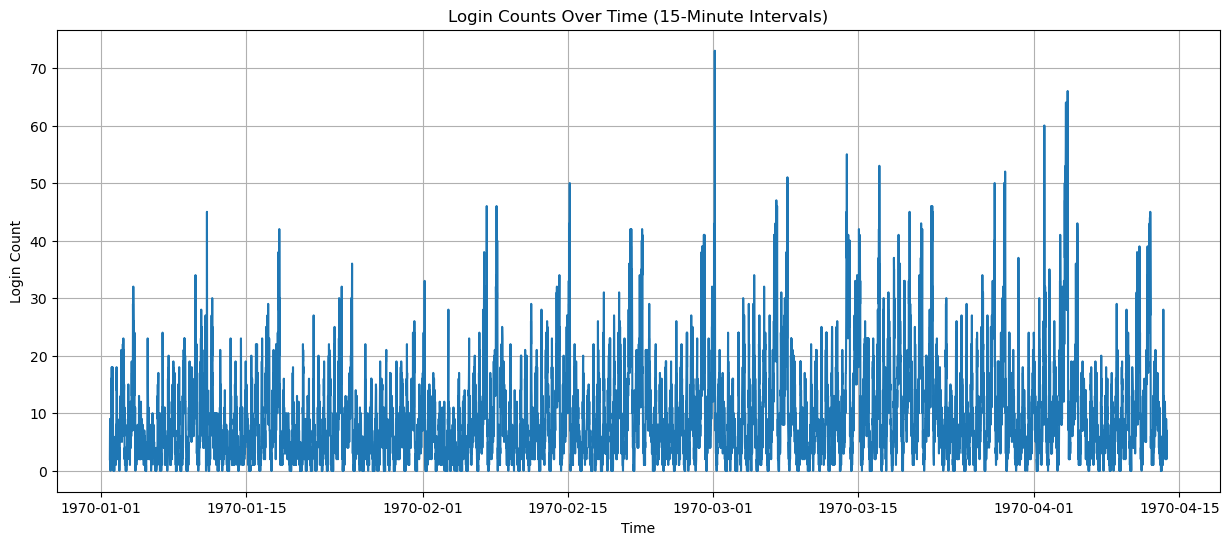

In [10]:
# Plot the time series
plt.figure(figsize=(15, 6))
plt.plot(login_counts['login_time'], login_counts['login_count'])
plt.title('Login Counts Over Time (15-Minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.grid(True)
plt.show()

In [11]:
login_counts.describe()

,login_count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [12]:
# Create new columns for month_day and weekday
login_counts['month_day'] = login_counts['login_time'].dt.day
login_counts['weekday'] = login_counts['login_time'].dt.weekday

In [13]:
# Print the head of login_counts with new columns
print(login_counts.head())

           login_time  login_count  month_day  weekday
0 1970-01-01 20:00:00            2          1        3
1 1970-01-01 20:15:00            6          1        3
2 1970-01-01 20:30:00            9          1        3
3 1970-01-01 20:45:00            7          1        3
4 1970-01-01 21:00:00            1          1        3


**part 2 See Pdf**

**Part 3 Predictive Modeling**

In [14]:
# Load the data
file_path = '/Users/samanthalee/Downloads/ultimate_challenge/ultimate_data_challenge.json'

df = pd.read_json(file_path)

In [15]:
# Convert the data to a DataFrame
df = pd.DataFrame(df)

In [16]:
# Check for missing values
print(df.isnull().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


In [17]:
# Explore the structure of the dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None
       trips_in_first_30_days  avg_rating_of_driver     avg_surge  \
coun

In [18]:
# Handle missing values (if any)
# For example, fill missing values in avg_rating_by_driver and avg_rating_of_driver with mean
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)


In [19]:
# Calculate the fraction of users retained
retained_users = df['trips_in_first_30_days'] > 0
fraction_retained = retained_users.sum() / len(retained_users)
print(f"Fraction of retained users: {fraction_retained:.2%}")


Fraction of retained users: 69.22%


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score



In [21]:
# Convert 'last_trip_date' and 'signup_date' to datetime objects
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [22]:
# Define target variable
df['active_in_sixth_month'] = (df['last_trip_date'] - df['signup_date']).dt.days > 150
target = df['active_in_sixth_month']

In [23]:
# Handle categorical variables (e.g., one-hot encoding for 'city' and 'phone')
df = pd.get_dummies(df, columns=['city', 'phone'], drop_first=True)


In [24]:
# Select features
features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 'avg_surge',
            'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct', 'city_King\'s Landing', 'city_Winterfell',
            'phone_iPhone']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], target, test_size=0.2, random_state=42)


In [26]:
# Instantiate Logistic Regression model
model = LogisticRegression()


In [27]:
from sklearn.preprocessing import StandardScaler

# Scale the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate Logistic Regression model with increased max_iter to eliminate convergence warning while fitting the Logistic Regression model. 
model = LogisticRegression(max_iter=1000)


In [28]:
# Fit the model to the training data
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [29]:
# Make predictions on the testing data
y_pred = model.predict(X_test)


In [30]:
# Evaluate the model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred))



Accuracy: 76.65%
              precision    recall  f1-score   support

       False       0.78      0.95      0.86      7534
        True       0.58      0.20      0.29      2466

    accuracy                           0.77     10000
   macro avg       0.68      0.57      0.58     10000
weighted avg       0.73      0.77      0.72     10000

